In [97]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [98]:
df=pd.read_csv("E:python Data File/Ecommerce - UK Retailer.csv")

In [99]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


# Update Data

In [100]:
df['InvoiceDate'] = df['InvoiceDate'].astype('datetime64[ns]')
df['Year'] = df.InvoiceDate.dt.year
df['Month'] = df.InvoiceDate.dt.month
df['year_month']=df.InvoiceDate.map(lambda x: 100*x.year + x.month)
df['Day']=(df.InvoiceDate.dt.dayofweek)+1 # +1 to make Monday=1.....until Sunday=7
df['Hour'] = df.InvoiceDate.dt.hour
df['Revenue'] = df['Quantity'] * df['UnitPrice']
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Year,Month,year_month,Day,Hour,Revenue
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010,12,201012,3,8,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,201012,3,8,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010,12,201012,3,8,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,201012,3,8,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,201012,3,8,20.34


# 1. Perform Basic EDA 

# a. Boxplot – All Numeric Variables 

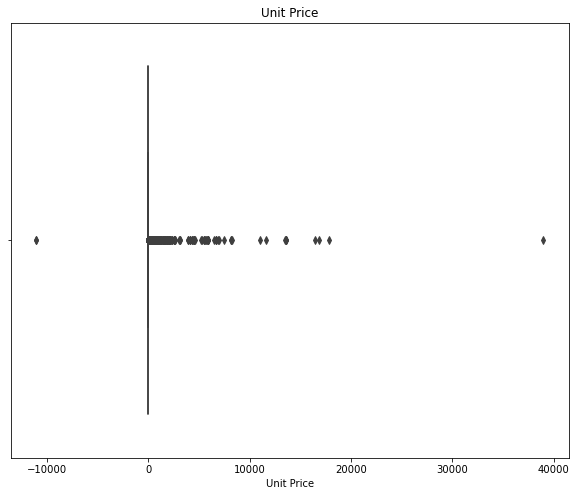

In [101]:
plt.subplots(figsize=(10,8))
sns.boxplot(df.UnitPrice)

plt.xlabel('Unit Price')
plt.title('Unit Price')
plt.show()

# b. Histogram – All Numeric Variables 

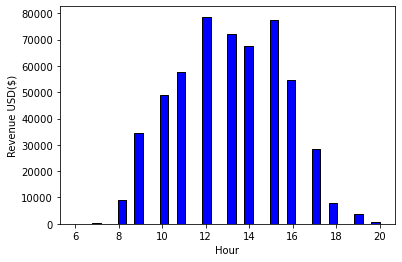

In [103]:
plt.hist(df['Hour'], color = 'blue', edgecolor = 'black',
         bins = int(180/5))
plt.xlabel('Hour')
plt.ylabel('Revenue USD($)')
plt.show()

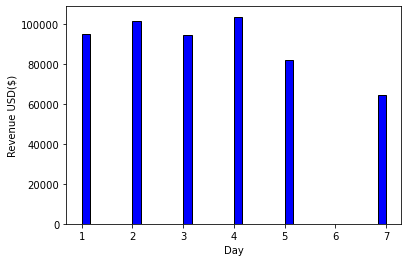

In [104]:
plt.hist(df['Day'], color = 'blue', edgecolor = 'black',
         bins = int(180/5))
plt.xlabel('Day')
plt.ylabel('Revenue USD($)')
plt.show()

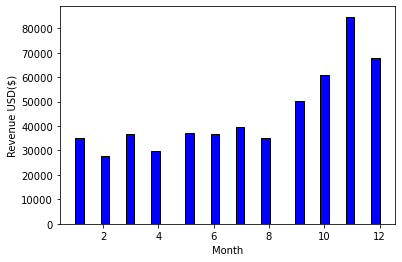

In [105]:
plt.hist(df['Month'], color = 'blue', edgecolor = 'black',
         bins = int(180/5))
plt.xlabel('Month')
plt.ylabel('Revenue USD($)')
plt.show()

# c. Distribution Plot – All Numeric Variables

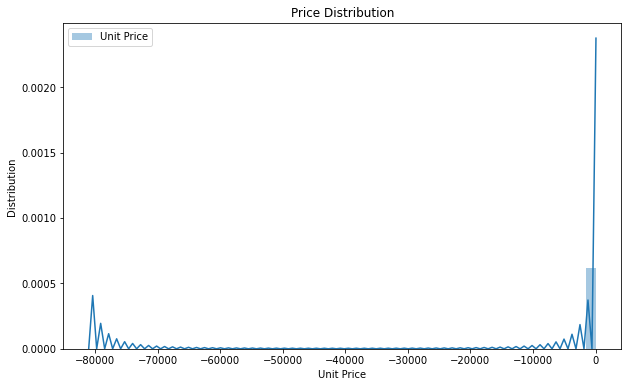

In [72]:
plt.subplots(figsize=(10,6))
sns.distplot(df.Quantity[df.Quantity < 50], label='Unit Price').legend()

plt.xlabel('Unit Price')
plt.ylabel('Distribution')
plt.title('Price Distribution')
plt.show()

# d. Aggregation for all numerical Columns 

In [44]:
df.describe()

,Quantity,UnitPrice,CustomerID,Year,Month,year_month,Day,Hour,Revenue
count,541909.000000,541909.000000,406829.000000,541909.000000,541909.000000,541909.000000,541909.000000,541909.000000,541909.000000
mean,9.552250,4.611114,15287.690570,2010.921609,7.553128,201099.713989,3.431277,13.078729,17.987795
std,218.081158,96.759853,1713.600303,0.268787,3.509055,25.788703,1.844709,2.443270,378.810824
min,-80995.000000,-11062.060000,12346.000000,2010.000000,1.000000,201012.000000,1.000000,6.000000,-168469.600000
25%,1.000000,1.250000,13953.000000,2011.000000,5.000000,201103.000000,2.000000,11.000000,3.400000
50%,3.000000,2.080000,15152.000000,2011.000000,8.000000,201107.000000,3.000000,13.000000,9.750000
75%,10.000000,4.130000,16791.000000,2011.000000,11.000000,201110.000000,5.000000,15.000000,17.400000
max,80995.000000,38970.000000,18287.000000,2011.000000,12.000000,201112.000000,7.000000,20.000000,168469.600000


# e. Unique Values across all columns

In [45]:
pd.unique(df[['Country','Description','StockCode','Country']].values.ravel())

array(['United Kingdom', 'WHITE HANGING HEART T-LIGHT HOLDER', '85123A',
       ..., 'CREAM HANGING HEART T-LIGHT HOLDER',
       'PAPER CRAFT , LITTLE BIRDIE', '23843'], dtype=object)

# f. Duplicate values across all columns 

In [107]:
df.duplicated().sum()

5268

# g. Correlation – Heatmap - All Numeric Variables 

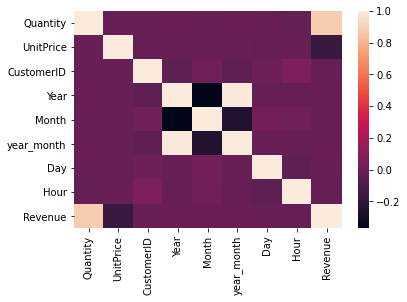

In [47]:
sns.heatmap(df.corr())
plt.show()

# h. Regression Plot - All Numeric Variables

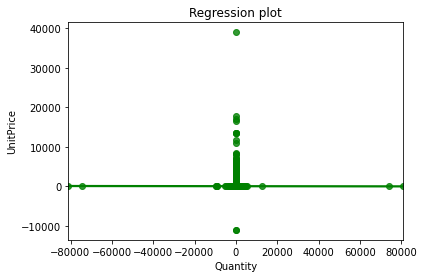

In [121]:
sns.regplot(x=df['Quantity'],y=df['UnitPrice'],data=df,color='g')
plt.xlabel('Quantity',fontsize=10)
plt.ylabel('UnitPrice',fontsize=10)
plt.title('Regression plot')
plt.show()

# i. Bar Plot – Every Categorical Variable vs every Numerical Variable 

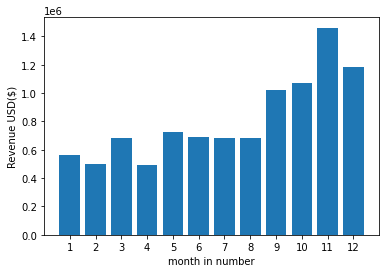

In [48]:
result=df.groupby('Month').sum()
month=range(1,13)
plt.bar(month,result['Revenue'])
plt.xticks(month)
plt.xlabel('month in number')
plt.ylabel('Revenue USD($)')
plt.show()

# j. Pair plot - All Numeric Variables 

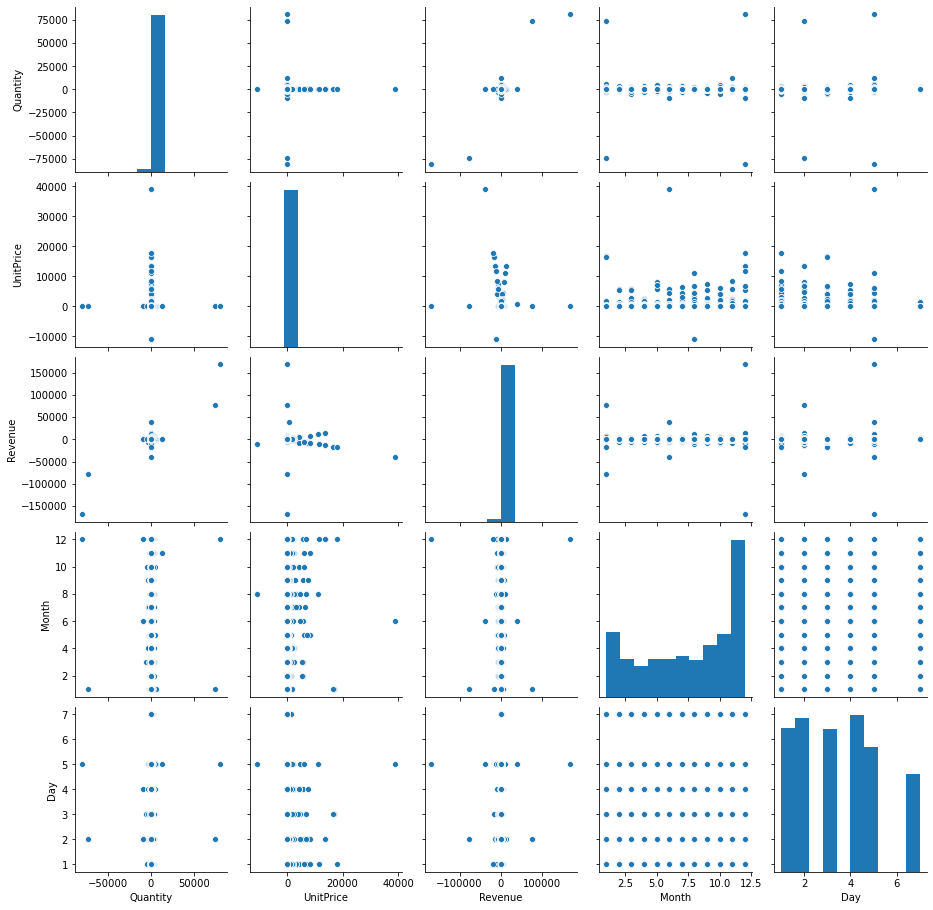

In [52]:
sns.pairplot(df,vars=["Quantity","UnitPrice","Revenue","Month","Day"])
plt.show()

# k. Line chart to show the trend of data - All Numeric/Date Variables 

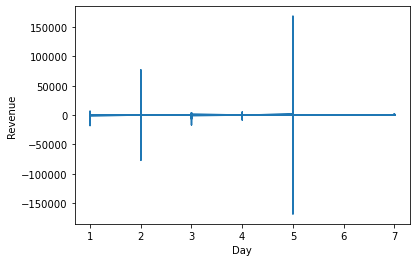

In [50]:
plt.plot(df['Day'],df['Revenue'])
plt.xlabel('Day')
plt.ylabel('Revenue')
plt.show()

# l. Plot the skewness - All Numeric Variables 

In [60]:
df.skew(axis=0,skipna=True)

Quantity       -0.264076
UnitPrice     186.506972
CustomerID      0.029835
Year           -3.137135
Month          -0.414813
year_month     -3.049078
Day             0.467195
Hour            0.005545
Revenue        -0.964389
dtype: float64

In [58]:
df.skew(axis=1,skipna=True)

0         2.957284
1         2.957288
2         2.957290
3         2.957288
4         2.957288
            ...   
541904    2.978223
541905    2.978222
541906    2.978224
541907    2.978224
541908    2.978223
Length: 541909, dtype: float64

# 2. Check for missing values in all columns and replace them with the appropriate metric (Mean/Median/Mode)

In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 531285 entries, 0 to 541908
Data columns (total 14 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    531285 non-null  object        
 1   StockCode    531285 non-null  object        
 2   Description  530693 non-null  object        
 3   Quantity     531285 non-null  int64         
 4   InvoiceDate  531285 non-null  datetime64[ns]
 5   UnitPrice    531285 non-null  float64       
 6   CustomerID   397924 non-null  float64       
 7   Country      531285 non-null  object        
 8   Year         531285 non-null  int64         
 9   Month        531285 non-null  int64         
 10  year_month   531285 non-null  int64         
 11  Day          531285 non-null  int64         
 12  Hour         531285 non-null  int64         
 13  Revenue      531285 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(6), object(4)
memory usage: 60.8+ MB


# 3. Remove duplicate rows 

In [66]:
df.drop_duplicates()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Year,Month,year_month,Day,Hour,Revenue
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010,12,201012,3,8,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,201012,3,8,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010,12,201012,3,8,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,201012,3,8,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,201012,3,8,20.34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,2011,12,201112,5,12,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,2011,12,201112,5,12,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,2011,12,201112,5,12,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,2011,12,201112,5,12,16.60


15855  duplicate rows removed

# 4. Remove rows which have negative values in Quantity column

In [73]:
df= df[(df['Quantity'] >= 0)]

In [79]:
df.head(3)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Year,Month,year_month,Day,Hour,Revenue
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010,12,201012,3,8,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,201012,3,8,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010,12,201012,3,8,22.00


# 5. Add the columns - Month, Day and Hour for the invoice 

In [63]:
df['InvoiceDate'] = df['InvoiceDate'].astype('datetime64[ns]')
df['Year'] = df.InvoiceDate.dt.year
df['Month'] = df.InvoiceDate.dt.month
df['year_month']=df.InvoiceDate.map(lambda x: 100*x.year + x.month)
df['Day']=(df.InvoiceDate.dt.dayofweek)+1 # +1 to make Monday=1.....until Sunday=7
df['Hour'] = df.InvoiceDate.dt.hour
df['Revenue'] = df['Quantity'] * df['UnitPrice']
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Year,Month,year_month,Day,Hour,Revenue
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010,12,201012,3,8,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,201012,3,8,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010,12,201012,3,8,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,201012,3,8,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,201012,3,8,20.34


# 6. How many orders made by the customers?

In [26]:
index = pd.Index(df['Quantity'])
print(f"Total orders made by the customers = {index.value_counts().sum()}")

Total orders made by the customers = 541909


In [27]:
total_order=df.groupby(by=['CustomerID','Country'], as_index=False)['InvoiceNo'].count().head(10)
print(total_order)

   CustomerID         Country  InvoiceNo
0     12346.0  United Kingdom          2
1     12347.0         Iceland        182
2     12348.0         Finland         31
3     12349.0           Italy         73
4     12350.0          Norway         17
5     12352.0          Norway         95
6     12353.0         Bahrain          4
7     12354.0           Spain         58
8     12355.0         Bahrain         13
9     12356.0        Portugal         59


# 7. TOP 5 customers with higher number of orders 

In [28]:
total_order.sort_values(by='InvoiceNo', ascending=False).head()

,CustomerID,Country,InvoiceNo
1,12347.0,Iceland,182
5,12352.0,Norway,95
3,12349.0,Italy,73
9,12356.0,Portugal,59
7,12354.0,Spain,58


# 8. How much money spent by the customers?

In [29]:
money_spent = df.groupby(by=['CustomerID','Country'], as_index=False)['Revenue'].sum()
print(money_spent)

      CustomerID         Country  Revenue
0        12346.0  United Kingdom     0.00
1        12347.0         Iceland  4310.00
2        12348.0         Finland  1797.24
3        12349.0           Italy  1757.55
4        12350.0          Norway   334.40
...          ...             ...      ...
4375     18280.0  United Kingdom   180.60
4376     18281.0  United Kingdom    80.82
4377     18282.0  United Kingdom   176.60
4378     18283.0  United Kingdom  2094.88
4379     18287.0  United Kingdom  1837.28

[4380 rows x 3 columns]


# 9. TOP 5 customers with highest money spent

In [30]:
money_spent.sort_values(by='Revenue', ascending=False)

,CustomerID,Country,Revenue
1711,14646.0,Netherlands,279489.02
4241,18102.0,United Kingdom,256438.49
3766,17450.0,United Kingdom,187482.17
1903,14911.0,EIRE,132572.62
57,12415.0,Australia,123725.45
...,...,...,...
133,12503.0,Spain,-1126.00
3878,17603.0,United Kingdom,-1165.30
1392,14213.0,United Kingdom,-1192.20
2244,15369.0,United Kingdom,-1592.49


# 10. How many orders per month? 

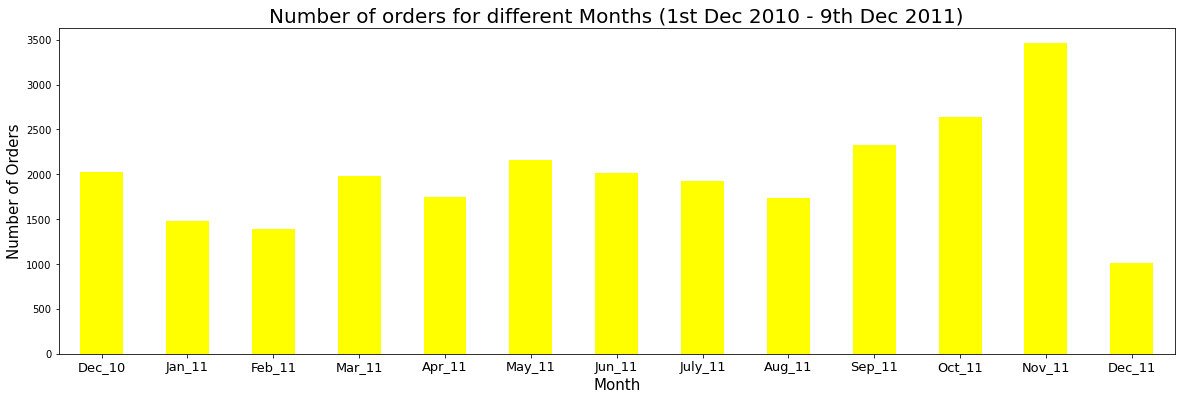

In [59]:
yum = df.groupby('InvoiceNo')['year_month'].unique().value_counts().sort_index().plot(kind='bar',figsize=(20,6),color='yellow')
yum.set_xlabel('Month',fontsize=15)
yum.set_ylabel('Number of Orders',fontsize=15)
yum.set_title('Number of orders for different Months (1st Dec 2010 - 9th Dec 2011)',fontsize=20)
yum.set_xticklabels(('Dec_10','Jan_11','Feb_11','Mar_11','Apr_11','May_11','Jun_11','July_11','Aug_11','Sep_11','Oct_11','Nov_11','Dec_11'), rotation='horizontal', fontsize=13)
plt.show()

# 11. How many orders per day? 

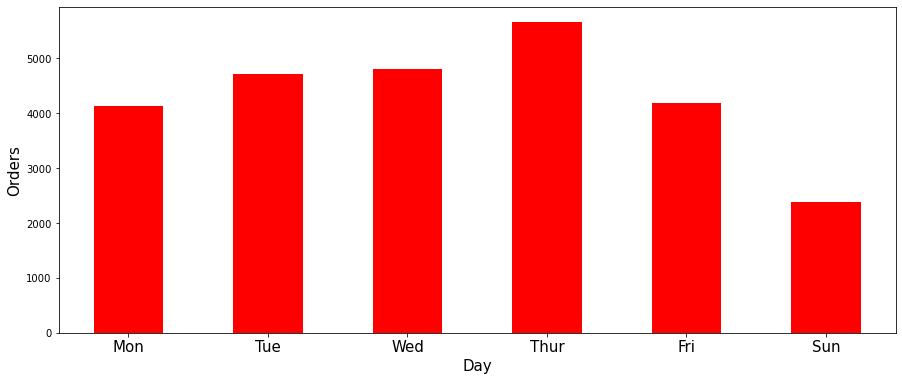

In [37]:
ax = df.groupby('InvoiceNo')['Day'].unique().value_counts().sort_index().plot(kind='bar',color='red',figsize=(15,6))
ax.set_xlabel('Day',fontsize=15)
ax.set_ylabel('Orders',fontsize=15)
ax.set_xticklabels(('Mon','Tue','Wed','Thur','Fri','Sun'), rotation='horizontal', fontsize=15)
plt.show()

# 12. How many orders per hour?

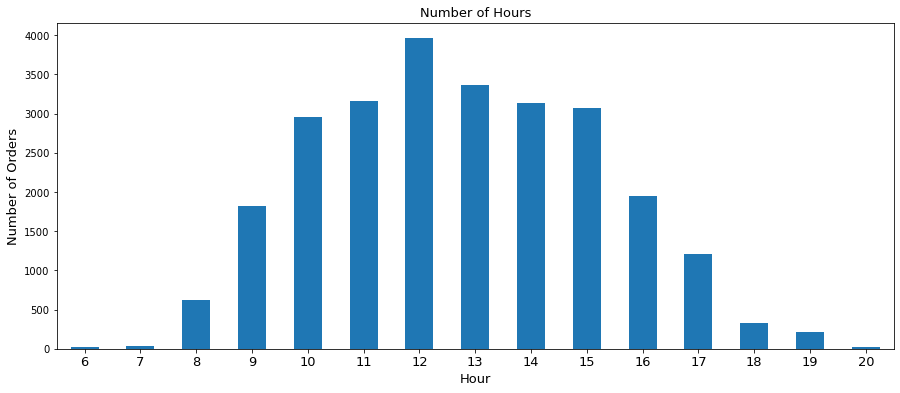

In [38]:
ax = df.groupby('InvoiceNo')['Hour'].unique().value_counts().iloc[:-1].sort_index().plot(kind='bar',figsize=(15,6))
ax.set_xlabel('Hour',fontsize=13)
ax.set_ylabel('Number of Orders',fontsize=13)
ax.set_title('Number of Hours',fontsize=13)
ax.set_xticklabels(range(6,21), rotation='horizontal', fontsize=13)
plt.show()

# 13. How many orders for each country? 

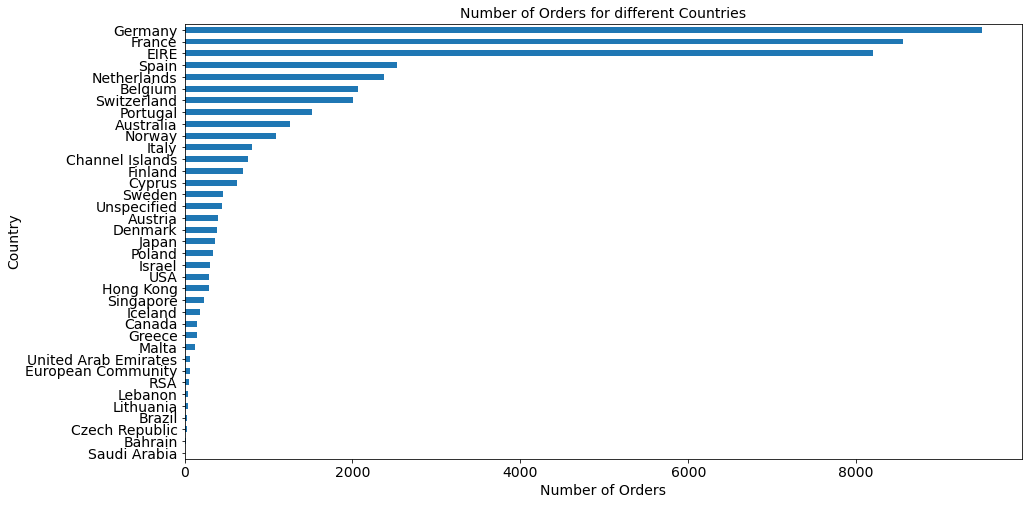

In [50]:
group_country_orders = df.groupby('Country')['InvoiceNo'].count().sort_values()
del group_country_orders['United Kingdom']

# number of unique customers in each country (without UK)
plt.subplots(figsize=(15,8))
group_country_orders.plot(kind='barh', fontsize=14)
plt.xlabel('Number of Orders', fontsize=14)
plt.ylabel('Country', fontsize=14)
plt.title('Number of Orders for different Countries', fontsize=14)
plt.show()

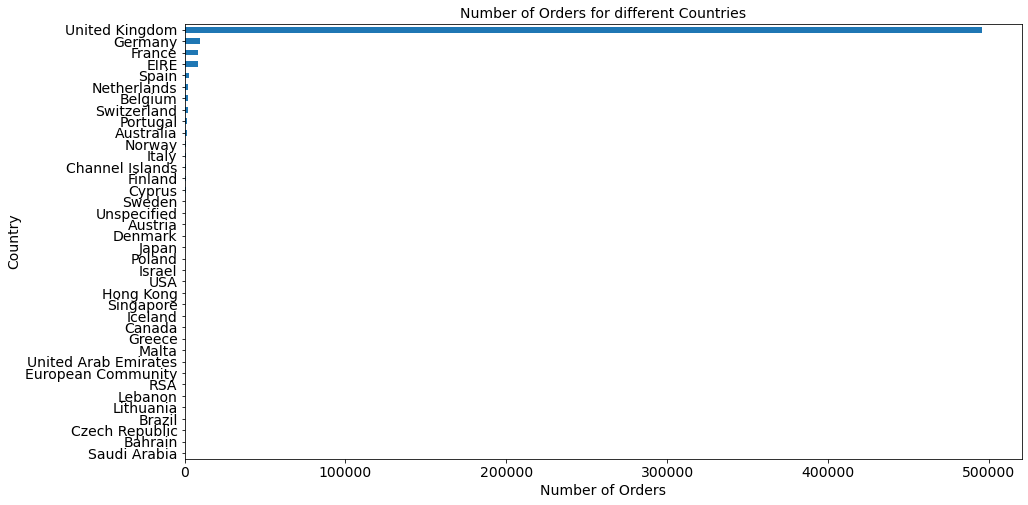

In [51]:
group_country_orders = df.groupby('Country')['InvoiceNo'].count().sort_values()
#del group_country_orders['United Kingdom']

# number of unique customers in each country (with UK)
plt.subplots(figsize=(15,8))
group_country_orders.plot(kind='barh', fontsize=14)
plt.xlabel('Number of Orders', fontsize=14)
plt.ylabel('Country', fontsize=14)
plt.title('Number of Orders for different Countries', fontsize=14)
plt.show()

# 14. Orders trend across months

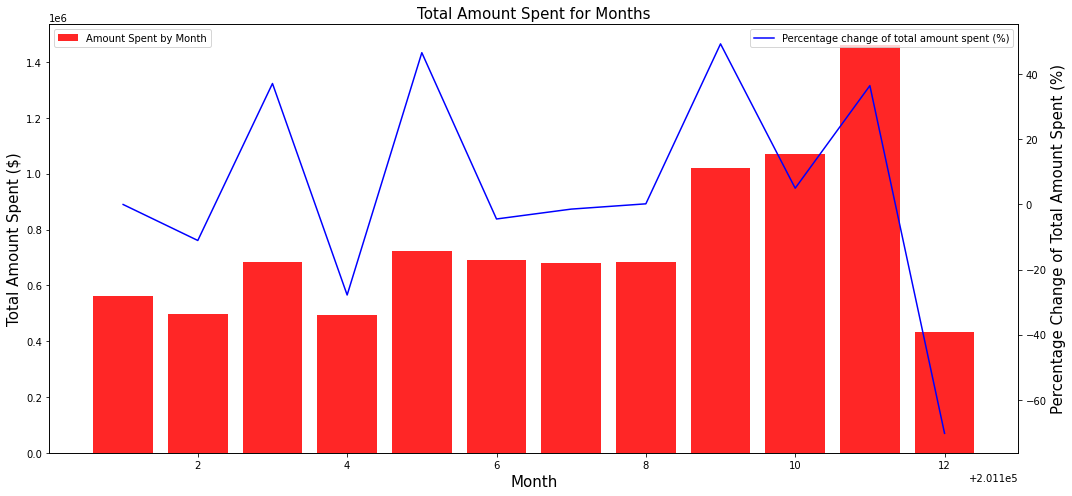

In [82]:
# trend plot
fig = plt.figure(figsize=(15, 7))
x1 = fig.add_subplot(111)

x1.set_xlabel('Month',fontsize=15)
x1.set_ylabel('Total Amount Spent ($)',fontsize=15)
x1.set_title('Total Amount Spent for Months',fontsize=15)

x1.bar(df.groupby(by=['year_month'])['Revenue'].sum().index.tolist()[1:],
        df.groupby(by=['year_month'])['Revenue'].sum()[1:],
        alpha=0.85,#If you want to make the graph plot more transparent, then you can make alpha less than 1, such as 0.5 or 0.25.
        label='Amount Spent by Month',color='red')

x2 = x1.twinx()# tread line

x2.set_ylabel('Percentage Change of Total Amount Spent (%)',fontsize=15)

#pct_change()Percentage change between the current and a prior element.
x2.plot(df.groupby(by=['year_month'])['Revenue'].sum().index.tolist()[1:], 
         df.groupby(by=['year_month'])['Revenue'].sum()[1:].pct_change().fillna(0)*100,
         label='Percentage change of total amount spent (%)',
         color='blue')

x1.legend(loc='upper left')
x2.legend(loc='upper right')

fig.tight_layout()
plt.show()

# 15. How much money spent by each country?

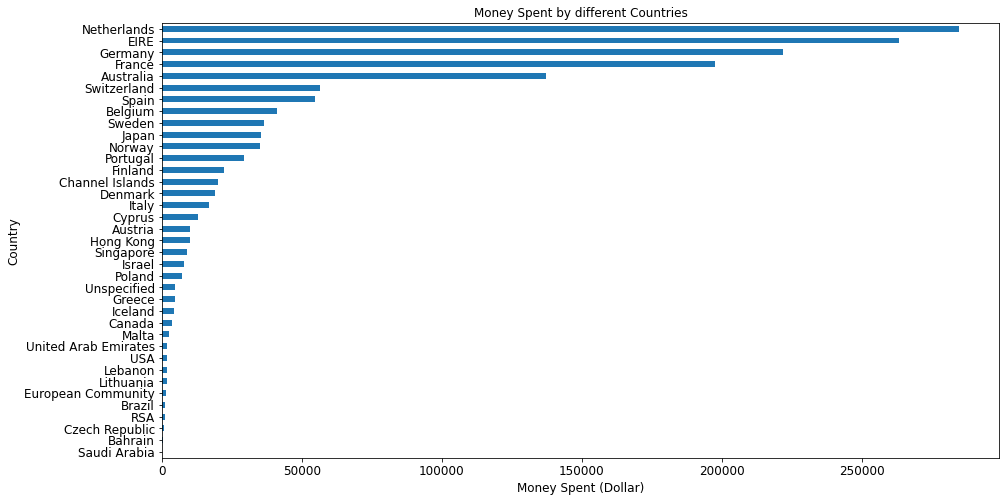

In [56]:
group_country_amount_spent = df.groupby('Country')['Revenue'].sum().sort_values()
del group_country_amount_spent['United Kingdom']

# plot total money spent by each country (without UK)
plt.subplots(figsize=(15,8))
group_country_amount_spent.plot(kind='barh', fontsize=12)
plt.xlabel('Money Spent (Dollar)', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.title('Money Spent by different Countries', fontsize=12)
plt.show()